# Hierarchical Clustering — Brief Overview

## What It Is
**Hierarchical clustering** builds a hierarchy of clusters without pre-specifying `k`.  
Two main strategies:
- **Agglomerative (bottom-up)**: start with each point as its own cluster and iteratively merge the closest clusters. *(Most common)*
- **Divisive (top-down)**: start with one cluster containing all points and iteratively split.

---

## Key Pieces
- **Distance metric**: how you measure point/cluster similarity (e.g., Euclidean, Manhattan, cosine).
- **Linkage criterion**: how you measure distance **between clusters**:
  - **Single**: min pairwise distance (can chain; sensitive to noise).
  - **Complete**: max pairwise distance (compact clusters; sensitive to outliers).
  - **Average (UPGMA)**: mean pairwise distance (balanced).
  - **Ward**: merges that minimize increase in within-cluster variance (works well with Euclidean).
- **Dendrogram**: a tree diagram showing the merge/split history; “cut” it at a height to choose clusters.

---

## How Agglomerative Works (High-Level)
1. Start with `n` singleton clusters.
2. Compute inter-cluster distances using your chosen **metric** and **linkage**.
3. Merge the two closest clusters.
4. Update the distance matrix.
5. Repeat steps 3–4 until one cluster remains.
6. **Cut** the dendrogram at a chosen height to get `k` clusters.

---

## Choosing the Number of Clusters
- **Cut the dendrogram** where there’s a large vertical gap between merges.
- **Silhouette score**, **Davies–Bouldin**, **Calinski–Harabasz** on labels after cutting.
- **Inconsistency coefficient** or **cophenetic correlation** to assess dendrogram fidelity.

---

## Pros & Cons
**Advantages**
- No need to pre-set `k`.
- Dendrogram gives rich, interpretable structure.
- Flexible: many metrics & linkage options.

**Limitations**
- **Computationally heavier** than K-Means: naive agglomerative is \(O(n^3)\) time / \(O(n^2)\) memory; optimized variants exist.
- Sensitive to **scaling** and **noise/outliers** (especially single/complete).
- Once merged/split, decisions aren’t revisited (greedy).

---

## Practical Tips
- **Scale/standardize** features before distance-based clustering.
- Try several **linkages** (Ward for compact, Euclidean-friendly clusters).
- Use **dimensionality reduction** (PCA) if many features.

---




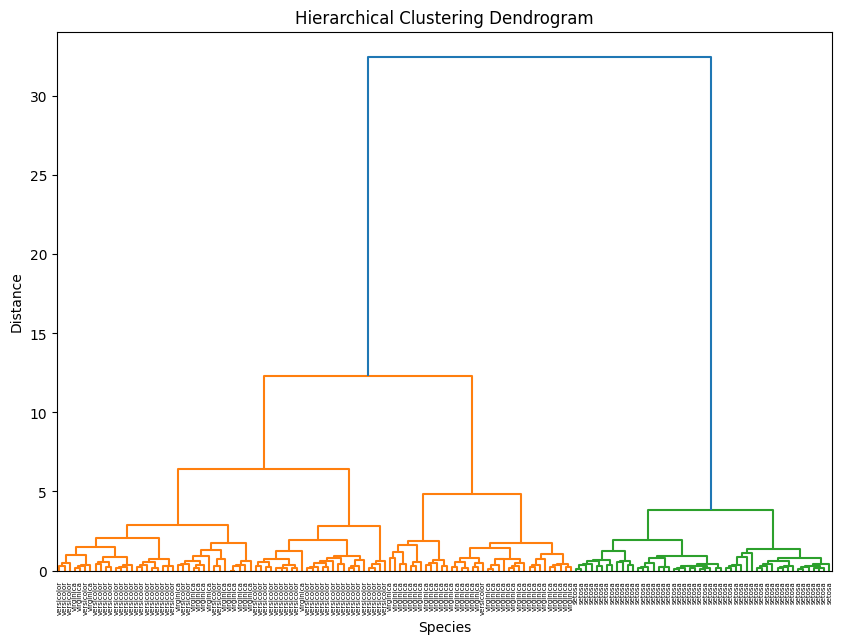

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the iris dataset
iris = load_iris()
data = iris.data
features = iris.feature_names

# Perform hierarchical clustering
linked = linkage(data, method='ward')

# Create a dendrogram
# ...existing code...
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=iris.target_names[iris.target],  # <-- Correct: 150 labels
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.show()
# ...existing code...

Silhouette Score: 0.554


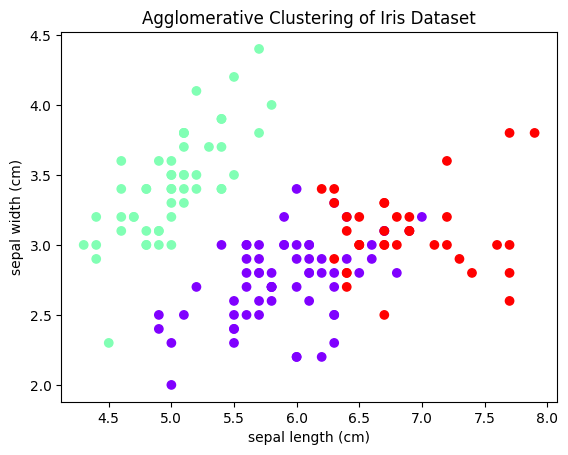

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load the iris dataset
iris = load_iris()
data = iris.data
features = iris.feature_names

# Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(data)

# Evaluate using Silhouette Score
silhouette_avg = silhouette_score(data, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Plot results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
plt.title('Agglomerative Clustering of Iris Dataset')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()